In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [2]:
animes = pd.read_csv('../archive/anime.csv')
animes

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [3]:
animes['Score'] = animes['Score'].replace('Unknown', 0).astype(float)
animes['Ranked'] = animes['Ranked'].replace('Unknown', 0).astype(float)
animes['Score'].value_counts()

0.00    5141
6.48      74
6.30      72
6.31      72
6.52      71
        ... 
3.19       1
4.20       1
4.35       1
3.32       1
4.06       1
Name: Score, Length: 533, dtype: int64

In [4]:
animes.rename(columns={'MAL_ID':'anime_id'}, inplace=True)

### Visualization

In [5]:
animes.head().T

,0,1,2,3,4
anime_id,1,5,6,7,8
Name,Cowboy Bebop,Cowboy Bebop: Tengoku no Tobira,Trigun,Witch Hunter Robin,Bouken Ou Beet
Score,8.78,8.39,8.24,7.27,6.98
Genres,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","Action, Drama, Mystery, Sci-Fi, Space","Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Action, Mystery, Police, Supernatural, Drama, ...","Adventure, Fantasy, Shounen, Supernatural"
English name,Cowboy Bebop,Cowboy Bebop:The Movie,Trigun,Witch Hunter Robin,Beet the Vandel Buster
Japanese name,カウボーイビバップ,カウボーイビバップ 天国の扉,トライガン,Witch Hunter ROBIN (ウイッチハンターロビン),冒険王ビィト
Type,TV,Movie,TV,TV,TV
Episodes,26,1,26,26,52
Aired,"Apr 3, 1998 to Apr 24, 1999","Sep 1, 2001","Apr 1, 1998 to Sep 30, 1998","Jul 2, 2002 to Dec 24, 2002","Sep 30, 2004 to Sep 29, 2005"
Premiered,Spring 1998,Unknown,Spring 1998,Summer 2002,Fall 2004


In [6]:
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   anime_id       17562 non-null  int64  
 1   Name           17562 non-null  object 
 2   Score          17562 non-null  float64
 3   Genres         17562 non-null  object 
 4   English name   17562 non-null  object 
 5   Japanese name  17562 non-null  object 
 6   Type           17562 non-null  object 
 7   Episodes       17562 non-null  object 
 8   Aired          17562 non-null  object 
 9   Premiered      17562 non-null  object 
 10  Producers      17562 non-null  object 
 11  Licensors      17562 non-null  object 
 12  Studios        17562 non-null  object 
 13  Source         17562 non-null  object 
 14  Duration       17562 non-null  object 
 15  Rating         17562 non-null  object 
 16  Ranked         17562 non-null  float64
 17  Popularity     17562 non-null  int64  
 18  Member

In [7]:
animes.describe()

,anime_id,Score,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped,Plan to Watch
count,17562.000000,17562.000000,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,1.756200e+04,17562.000000,17562.000000,17562.000000
mean,21477.192347,4.604299,7103.081540,8763.452340,3.465854e+04,457.746270,2231.487758,2.209557e+04,955.049653,1176.599533,8199.831227
std,14900.093170,3.054669,4930.733437,5059.327278,1.252821e+05,4063.473313,14046.688133,9.100919e+04,4275.675096,4740.348653,23777.691963
min,1.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000
25%,5953.500000,0.000000,2626.250000,4383.500000,3.360000e+02,0.000000,13.000000,1.110000e+02,6.000000,37.000000,112.000000
50%,22820.000000,6.060000,7011.000000,8762.500000,2.065000e+03,3.000000,73.000000,8.175000e+02,45.000000,77.000000,752.500000
75%,35624.750000,6.860000,11408.000000,13145.000000,1.322325e+04,31.000000,522.000000,6.478000e+03,291.750000,271.000000,4135.500000
max,48492.000000,9.190000,15780.000000,17565.000000,2.589552e+06,183914.000000,887333.000000,2.182587e+06,187919.000000,174710.000000,425531.000000


### VISUALIZATION

In [8]:
# animes["Genres"] = animes["Genres"].str.split(", ")

In [9]:
# animes["Genres"].iloc[0]

(0.0, 2.0, 0.9, 1.2)

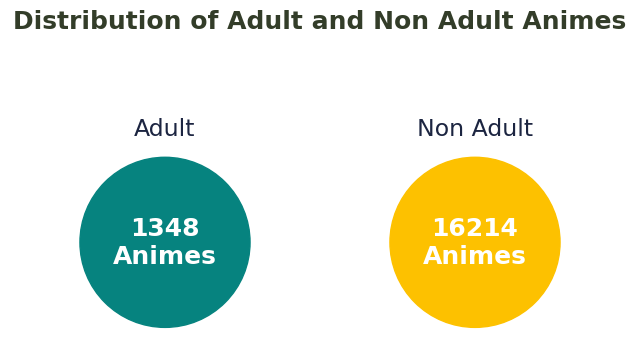

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(x=[0.5, 1.5], y=[1,1], s=15000, color=['#06837f', '#fdc100'])
plt.xlim(0,2)
plt.ylim(0.9,1.2)

plt.title('Distribution of Adult and Non Adult Animes', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, '{}\nAnimes'.format(str(len(list(filter(lambda x: 'Hentai' in x, animes['Genres']))))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(1.5, 1, '{}\nAnimes'.format(str(len(list(filter(lambda x: 'Hentai' not in x, animes['Genres']))))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(0.5, 1.11, 'Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.11, 'Non Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')

plt.axis('off')

In [11]:
animes['Studios'] = animes['Studios'].replace('Unknown', 0)
stu = animes['Studios'].value_counts().reset_index()
stu.rename(columns={"index": "Studio", "Studios": "No of animes"})
stu = stu.drop(0).head(20)

In [12]:
labels = stu['index'].unique()
values = stu['Studios'].unique()
colors = ['f72585','b5179e','7209b7','560bad','480ca8','3a0ca3','3f37c9','4361ee','4895ef','4cc9f0']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hole = .4,hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Anime Production by Studio",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()


In [13]:
edacol = ['anime_id', 'Name','English name', 'Score', 'Genres', 'Type', 'Aired', 'Premiered','Rating','Source','Episodes','Dropped'] 
eda = animes[edacol]
eda.set_index('anime_id',inplace=True)

In [14]:
labels = eda['Source'].value_counts().index
values = eda['Source'].value_counts().values
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Sources of Engagement",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

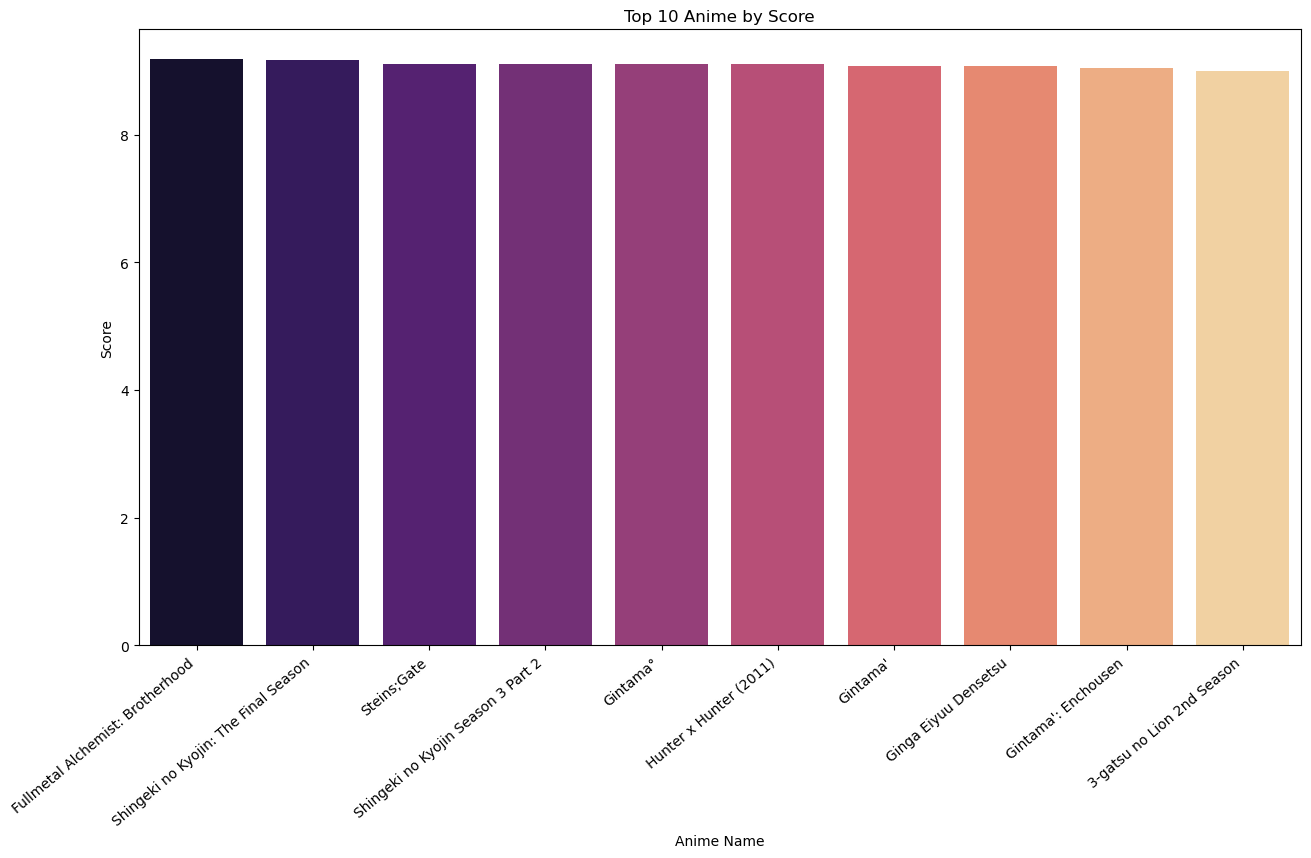

In [15]:
top_anime = animes.sort_values('Score', ascending=False).head(10)

# Plot the bar plot
plt.figure(figsize=(15, 8), dpi=100)
sb.barplot(x=top_anime['Name'], y=top_anime['Score'], data=top_anime, palette='magma')
plt.xlabel('Anime Name')
plt.ylabel('Score')
plt.title('Top 10 Anime by Score')
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [16]:
labels = animes['Type'].value_counts().index
values = animes['Type'].value_counts().values
colors = ["ff9f1c","ffbf69","ffffff","cbf3f0","2ec4b6"]
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Medium of Streaming",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

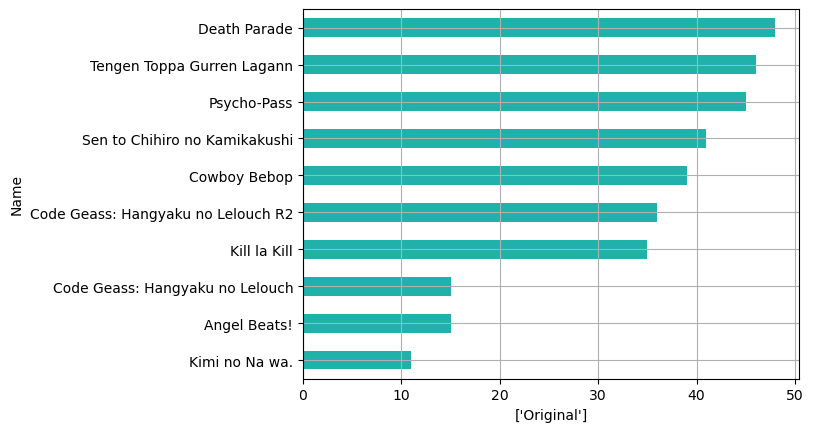

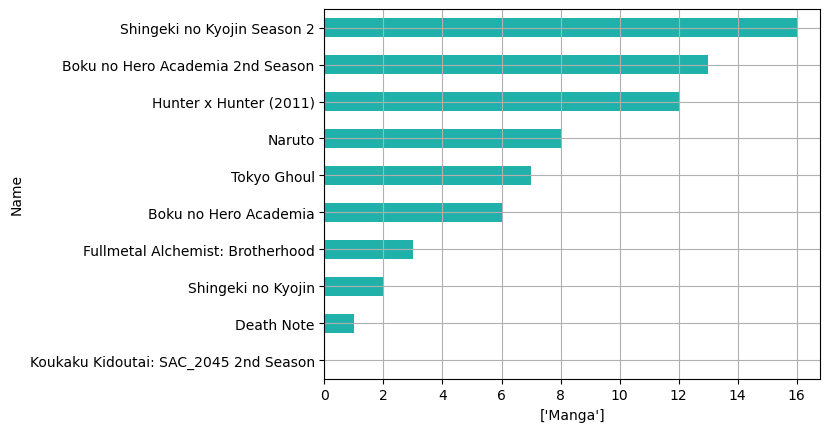

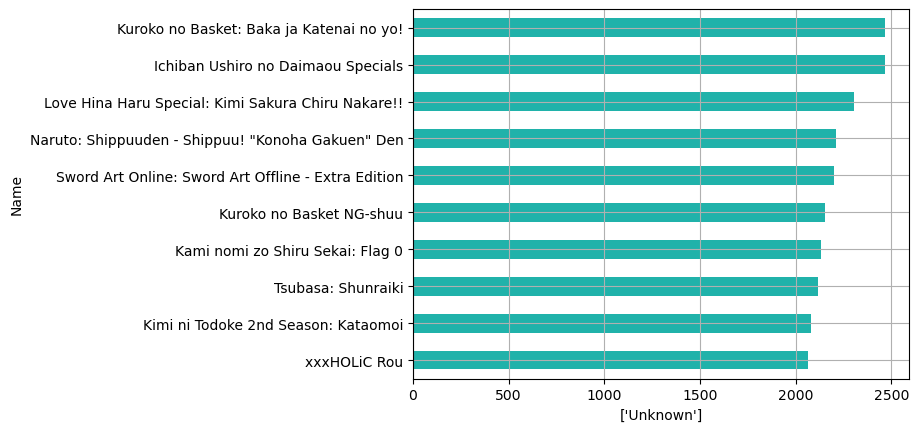

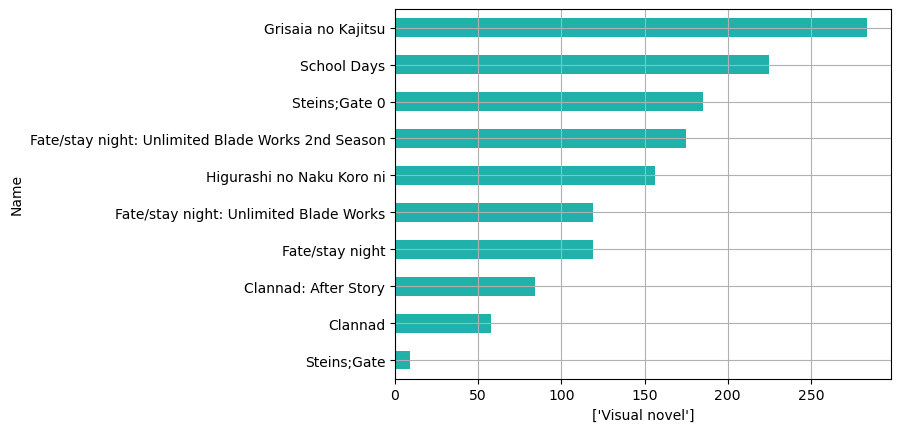

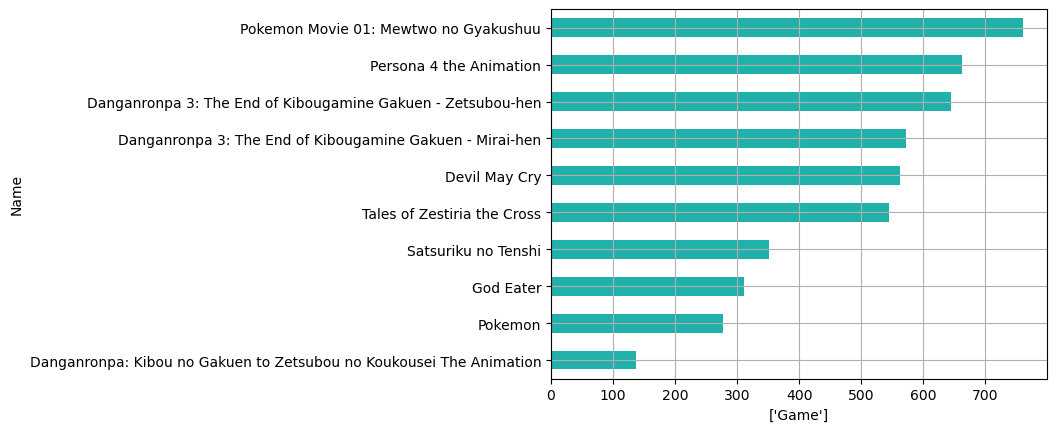

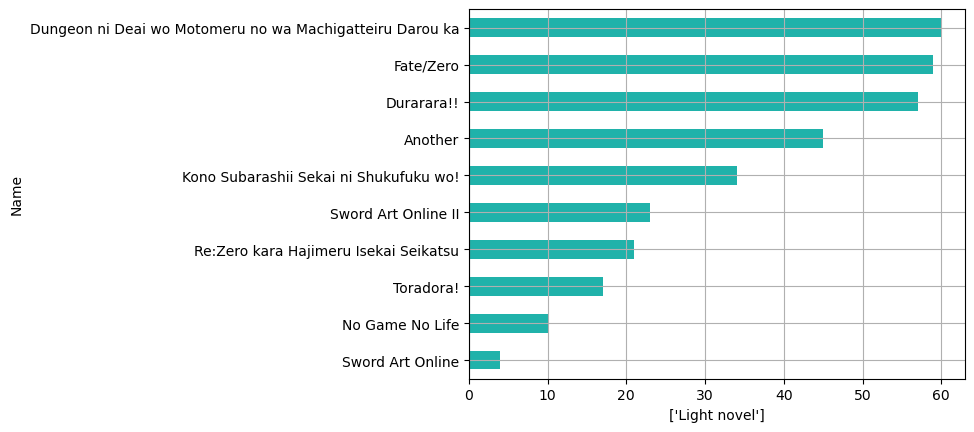

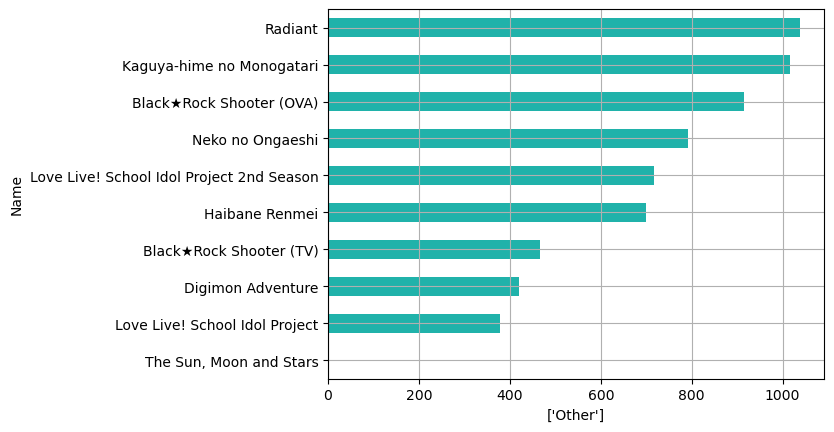

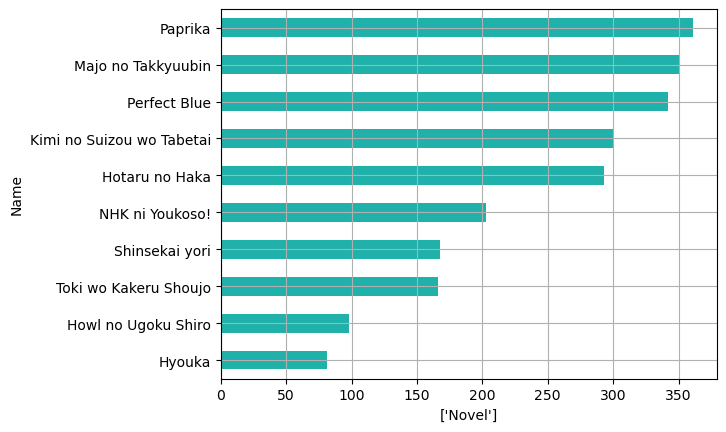

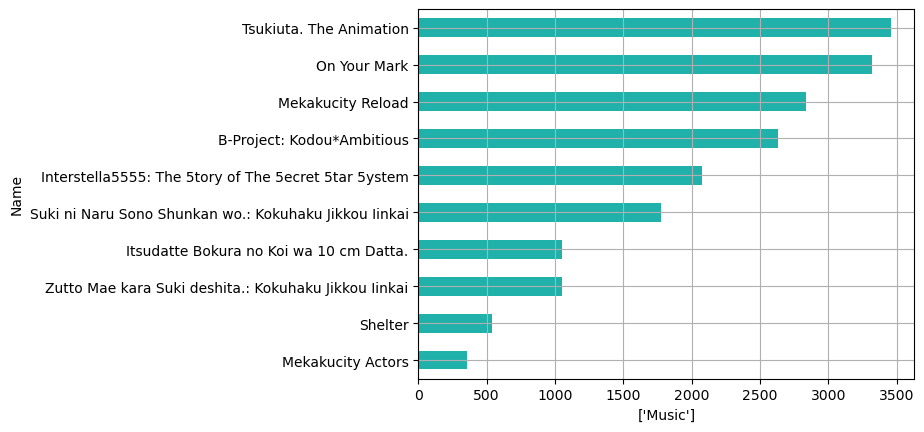

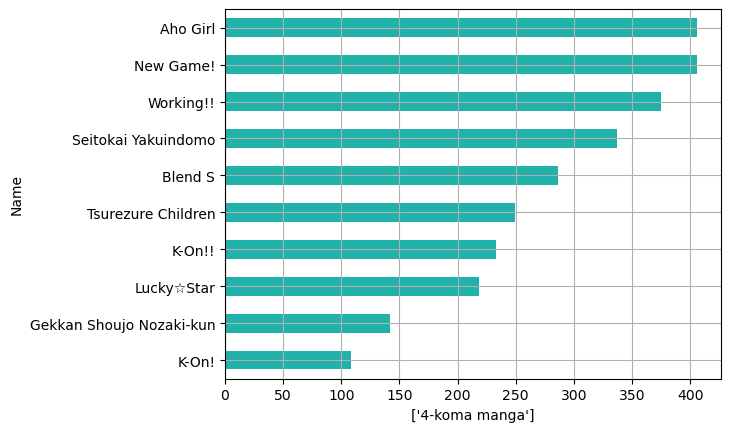

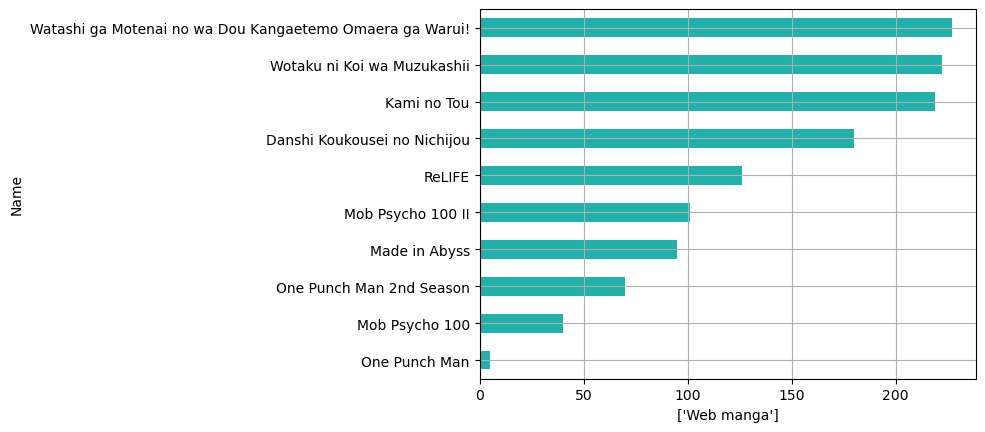

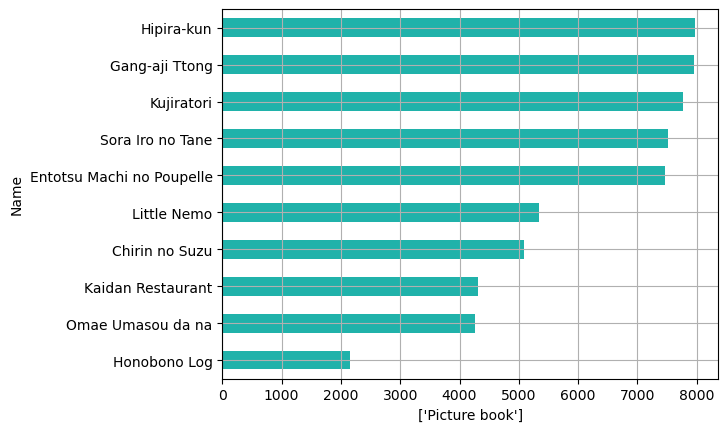

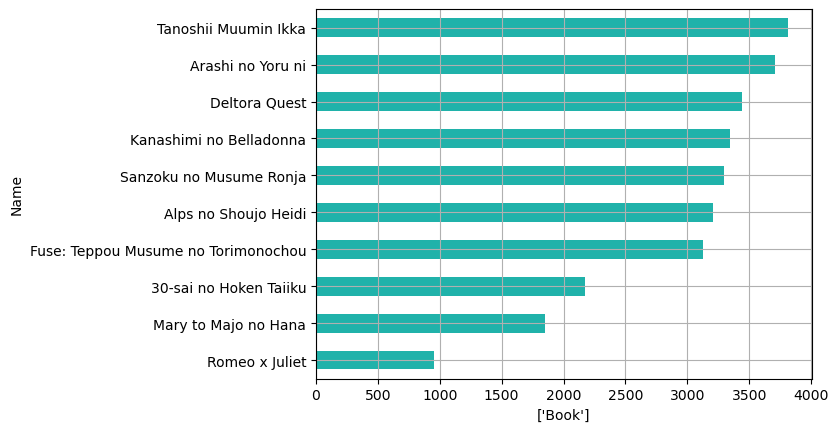

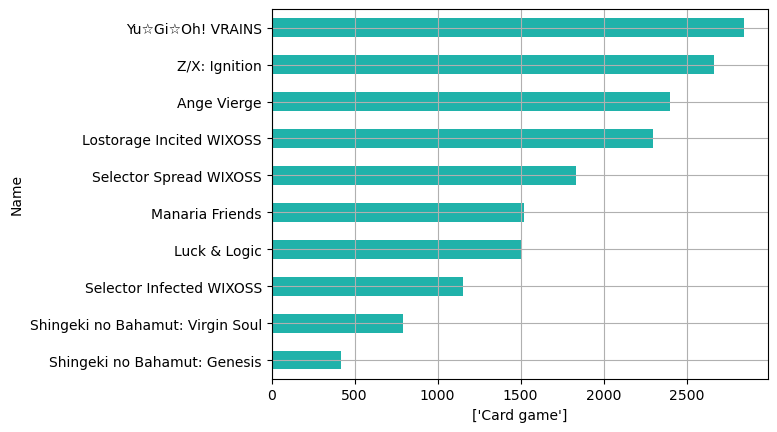

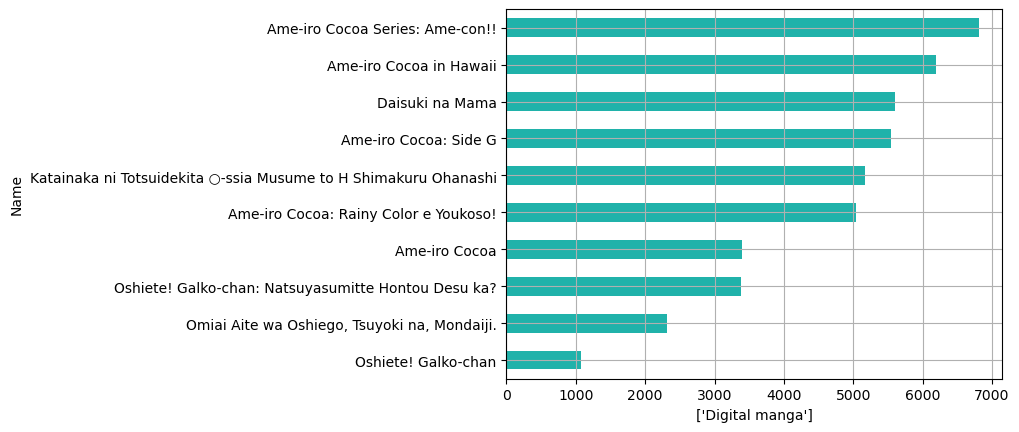

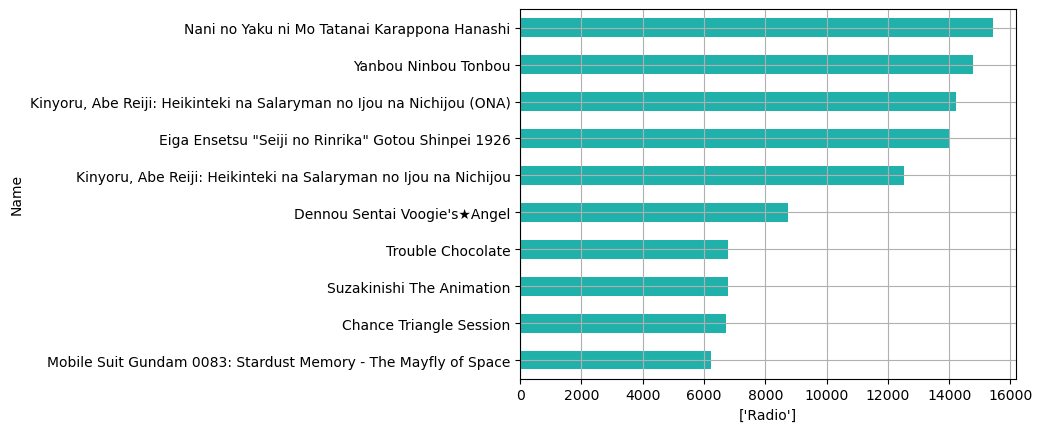

In [17]:
sour = animes.sort_values(by= 'Popularity').groupby('Source')[['Name','Popularity']]

for i in  eda['Source'].value_counts().index:
    bar = sour.get_group(i)
    bar.set_index('Name',inplace=True)
    bar.head(10).plot(kind='barh',legend =False,color = 'lightseagreen')
    plt.xlabel([i])
    plt.grid()
    
plt.show()

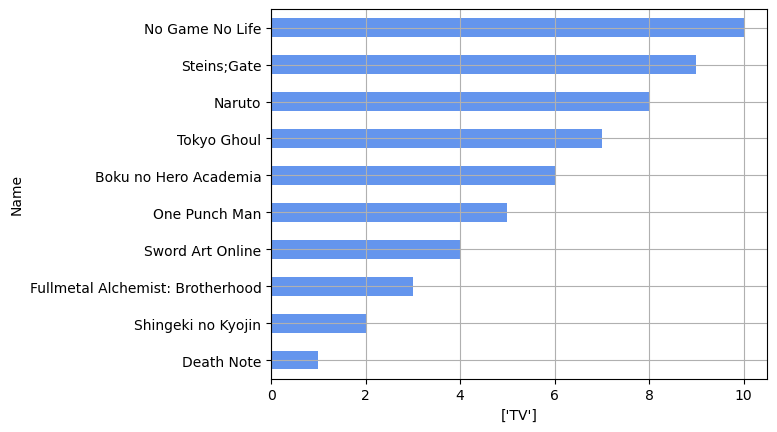

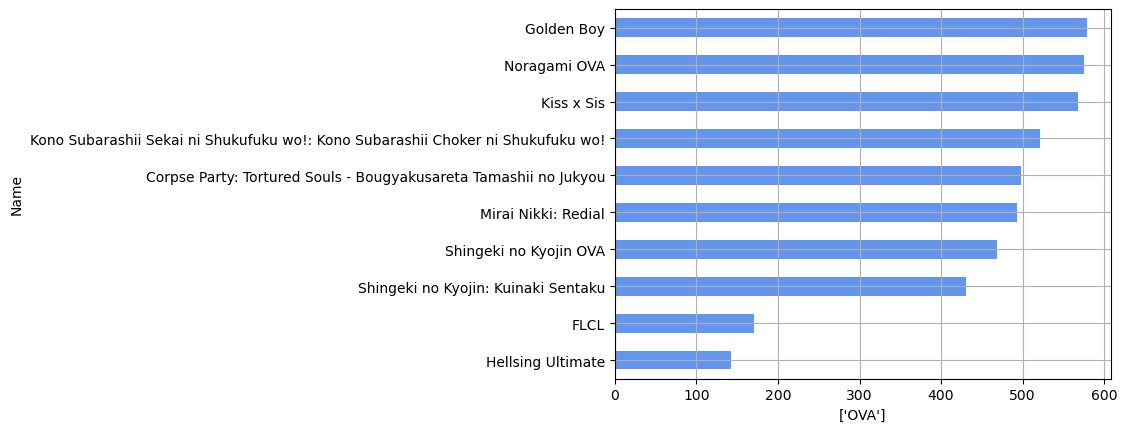

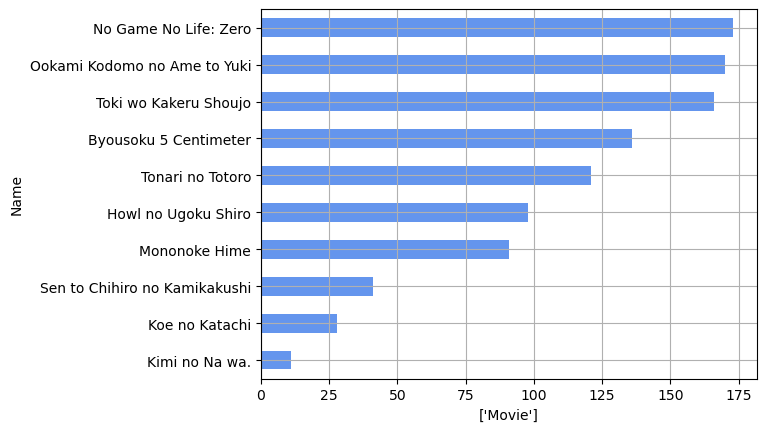

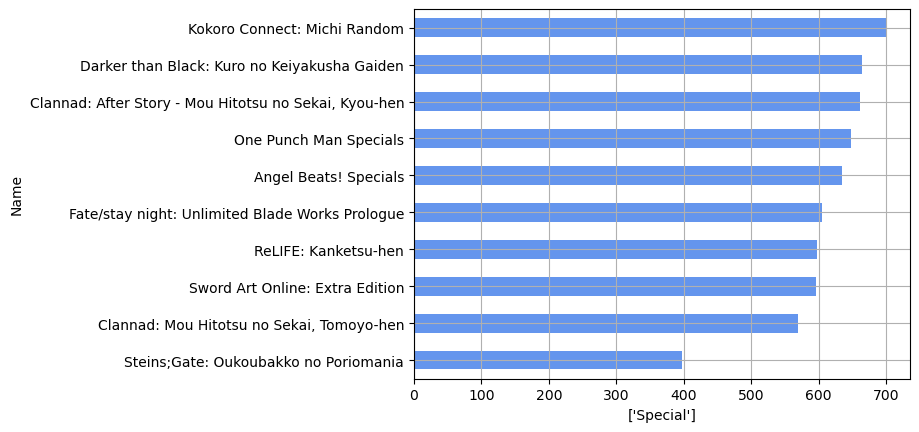

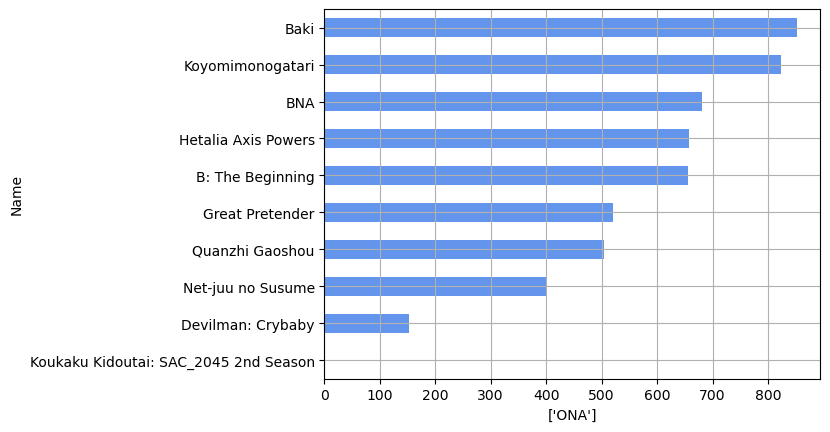

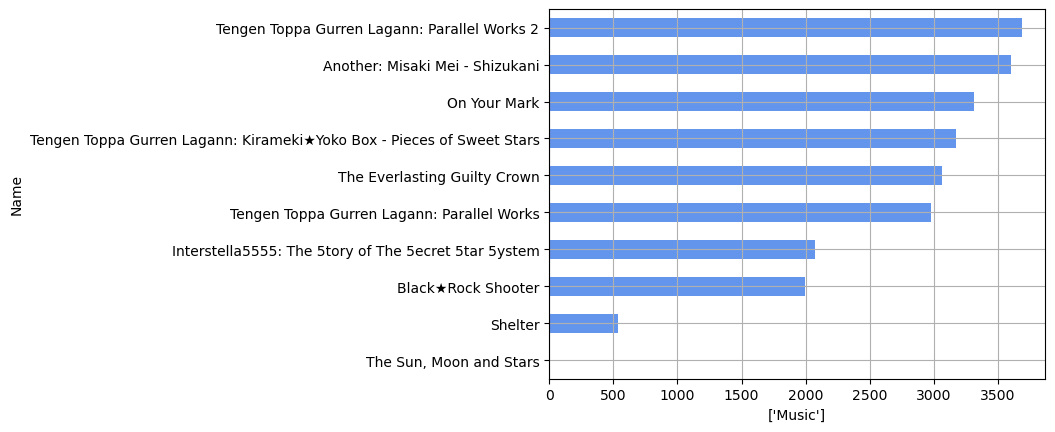

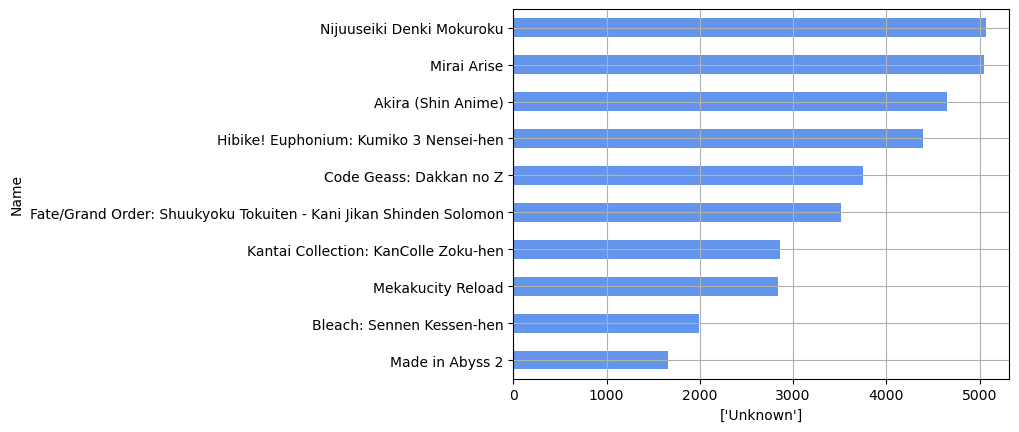

In [18]:
typ = animes.sort_values(by= 'Popularity').groupby('Type')[['Name','Popularity']]

for i in  eda['Type'].value_counts().index:
    bar = typ.get_group(i)
    bar.set_index('Name',inplace=True)
    bar.head(10).plot(kind='barh',legend =False,color = 'cornflowerblue')
    plt.xlabel([i])
    plt.grid()
    
plt.show()

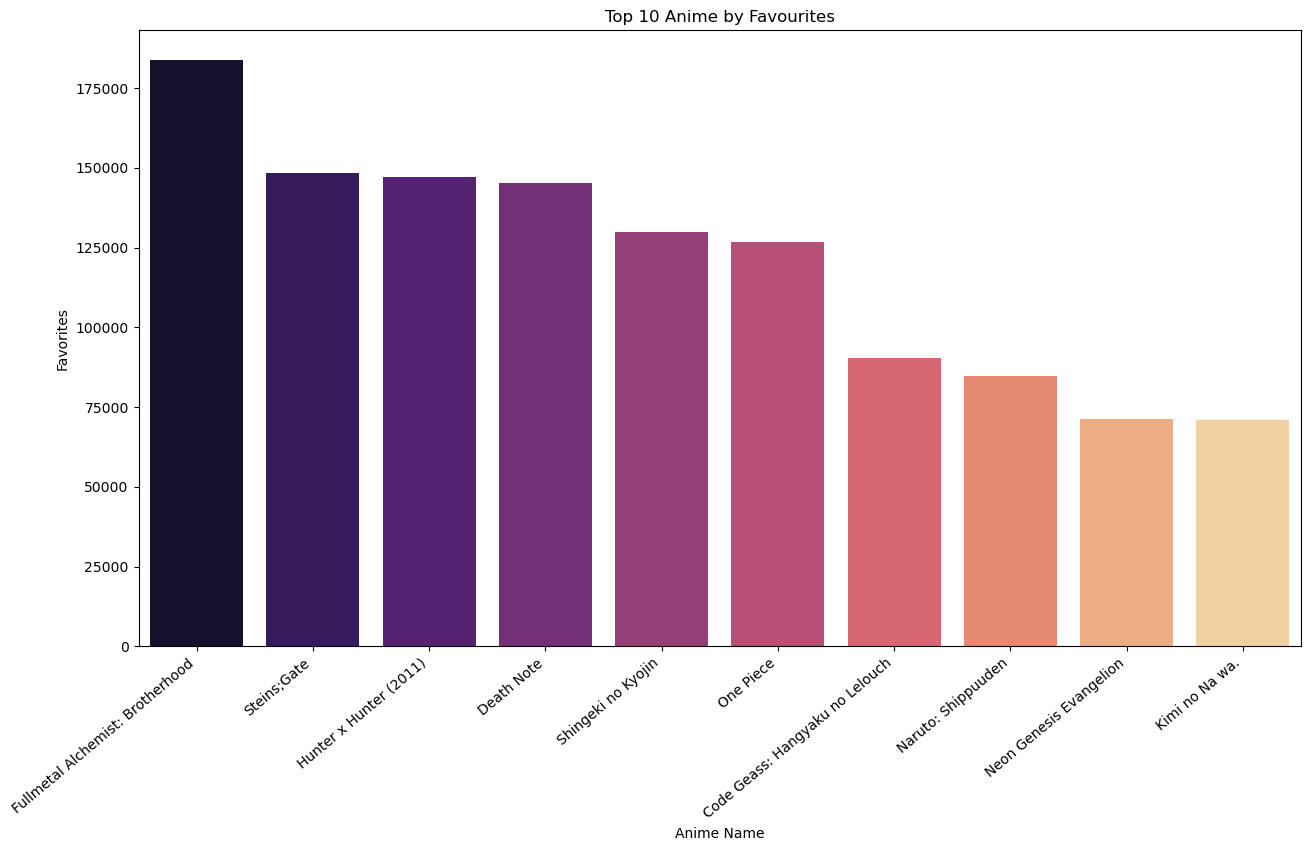

In [19]:
top_by_favourites = animes.sort_values('Favorites', ascending=False).head(10)

# Plot the bar plot
plt.figure(figsize=(15, 8), dpi=100)
sb.barplot(x=top_by_favourites['Name'], y=top_by_favourites['Favorites'], data=top_by_favourites, palette='magma')
plt.xlabel('Anime Name')
plt.ylabel('Favorites')
plt.title('Top 10 Anime by Favourites')
plt.xticks(rotation=40, ha = 'right')
plt.show()

Text(0.5, 1.0, 'Total Release Anime by Year')

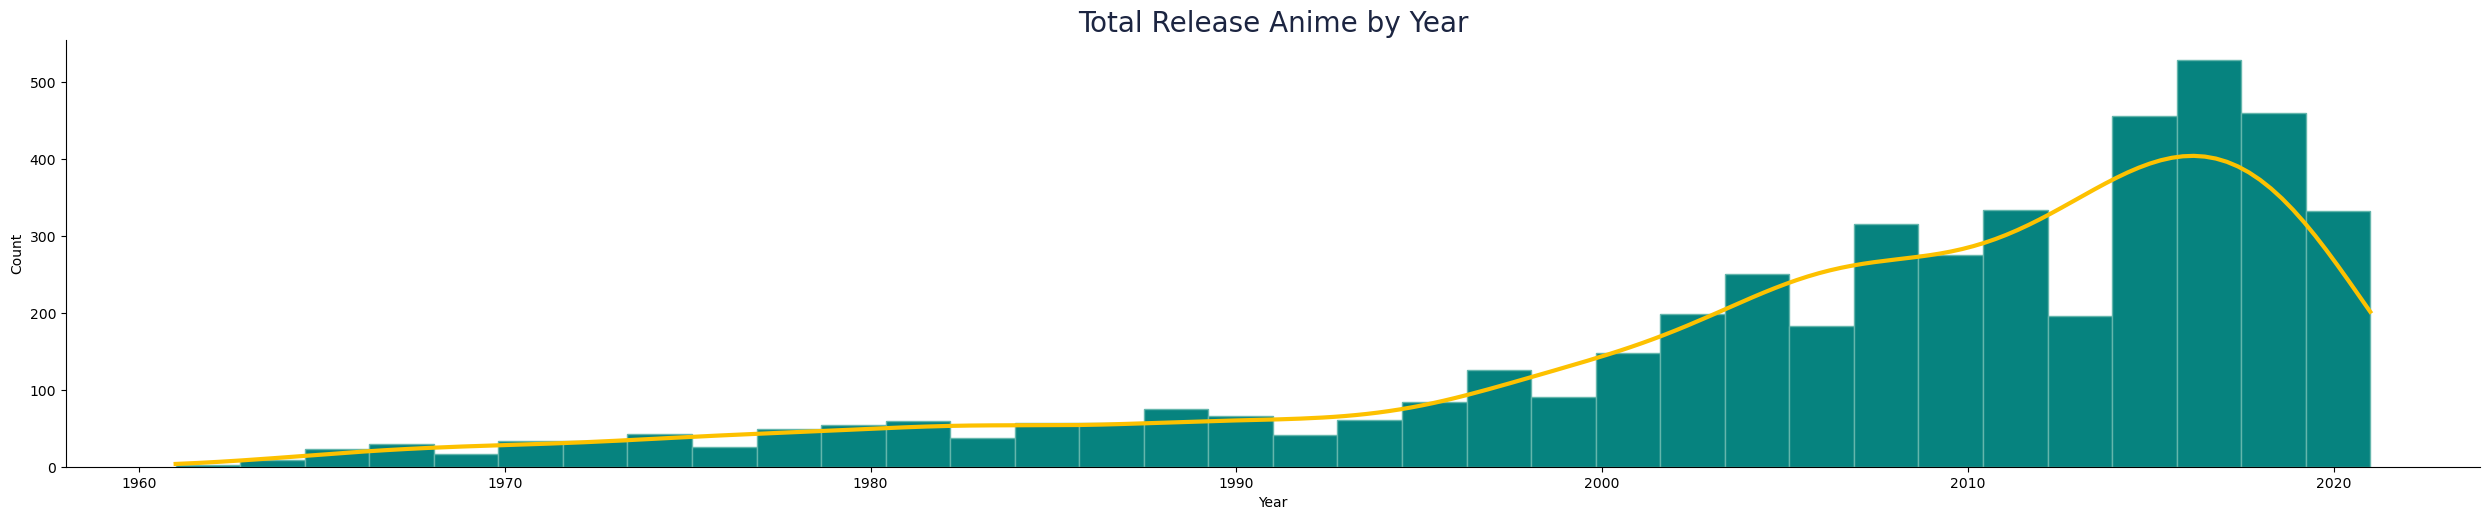

In [20]:
### Total realease of anime by year
animes["Year"] = animes["Premiered"].str.extract(r"(\d{4})")
animes["Year"] = pd.to_datetime(animes["Year"], format="%Y")

sb.displot(data=animes, x='Year', kind='hist', kde=True,
            color='#fdc100', facecolor='#06837f', edgecolor='#64b6ac', line_kws={'lw': 3}, aspect=5)
plt.title('Total Release Anime by Year', fontsize=20, weight=500, color='#1c2541')




In [21]:
anime_list = pd.read_csv('../archive/animelist.csv')

In [22]:
df = anime_list.iloc[:18522589,:]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18522589 entries, 0 to 18522588
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 706.6 MB


In [23]:
anime_full_data = pd.merge(df, animes, on='anime_id')
anime_full_data.head()

,user_id,anime_id,rating,watching_status,watched_episodes,Name,Score,Genres,English name,Japanese name,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,Year
0,0,67,9,1,1,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",Basilisk,バジリスク 甲賀忍法帖,...,11140.0,19570.0,17421.0,7816.0,3800.0,1554.0,643.0,316.0,244.0,2005-01-01
1,14,67,0,6,0,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",Basilisk,バジリスク 甲賀忍法帖,...,11140.0,19570.0,17421.0,7816.0,3800.0,1554.0,643.0,316.0,244.0,2005-01-01
2,34,67,10,2,24,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",Basilisk,バジリスク 甲賀忍法帖,...,11140.0,19570.0,17421.0,7816.0,3800.0,1554.0,643.0,316.0,244.0,2005-01-01
3,55,67,0,1,0,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",Basilisk,バジリスク 甲賀忍法帖,...,11140.0,19570.0,17421.0,7816.0,3800.0,1554.0,643.0,316.0,244.0,2005-01-01
4,57,67,0,1,0,Basilisk: Kouga Ninpou Chou,7.58,"Action, Adventure, Historical, Supernatural, R...",Basilisk,バジリスク 甲賀忍法帖,...,11140.0,19570.0,17421.0,7816.0,3800.0,1554.0,643.0,316.0,244.0,2005-01-01


In [24]:
anime_full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18522589 entries, 0 to 18522588
Data columns (total 40 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           int64         
 1   anime_id          int64         
 2   rating            int64         
 3   watching_status   int64         
 4   watched_episodes  int64         
 5   Name              object        
 6   Score             float64       
 7   Genres            object        
 8   English name      object        
 9   Japanese name     object        
 10  Type              object        
 11  Episodes          object        
 12  Aired             object        
 13  Premiered         object        
 14  Producers         object        
 15  Licensors         object        
 16  Studios           object        
 17  Source            object        
 18  Duration          object        
 19  Rating            object        
 20  Ranked            float64       
 21  Popula

In [25]:
anime_ratingCount = (anime_full_data.
     groupby(by = ['Name'])['rating'].count().reset_index()[['Name', 'rating']])

Text(0, 0.5, 'User Rating count')

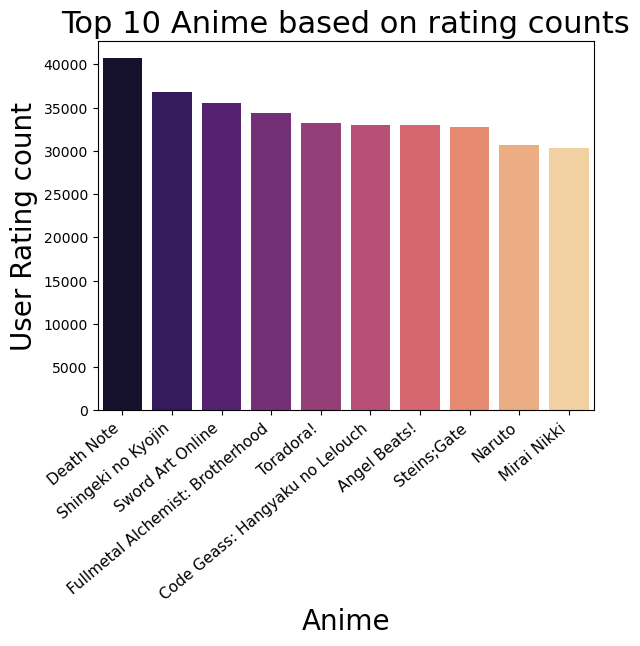

In [26]:
top10_animerating=anime_ratingCount[['Name', 'rating']].sort_values(by = 'rating',ascending = False).head(10)
ax=sb.barplot(x="Name", y="rating", data=top10_animerating, palette="magma")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts',fontsize = 22)
ax.set_xlabel('Anime',fontsize = 20) 
ax.set_ylabel('User Rating count', fontsize = 20)

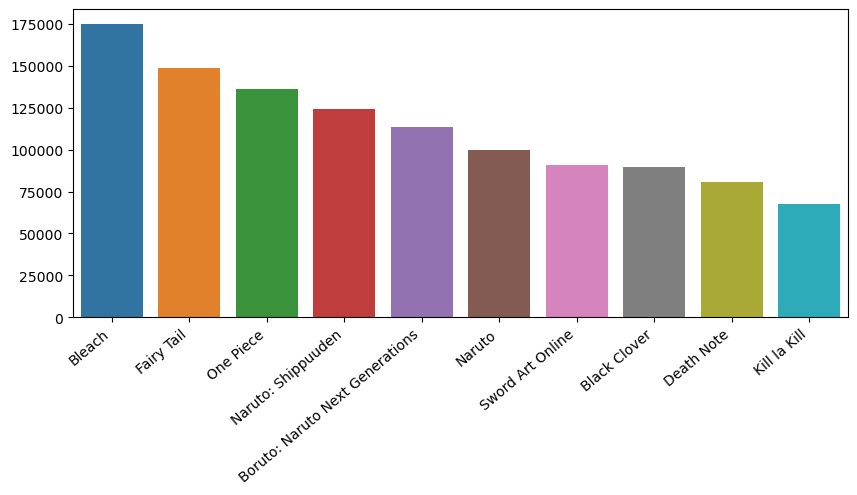

In [27]:
drop = eda[['Name','Dropped']].sort_values(by = 'Dropped',ascending =False).head(10)
plt.figure(figsize=(10,4), dpi = 100)
sb.barplot(x=drop['Name'].unique(),y=drop['Dropped'].unique(), data=drop)
plt.xticks(rotation=40, ha = 'right')
plt.show()

In [28]:
labels = eda['Rating'].value_counts().index
values = eda['Rating'].value_counts().values
colors = ["007f5f","2b9348","55a630","80b918","aacc00","bfd200","d4d700","dddf00","eeef20","ffff3f"]
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values)],layout=go.Layout(height=600, width=800))
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.update_layout(
    title={
        'text': "Rating based Anime",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

C:\Users\Filipe Pinto\AppData\Local\Temp\ipykernel_14828\2569612256.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



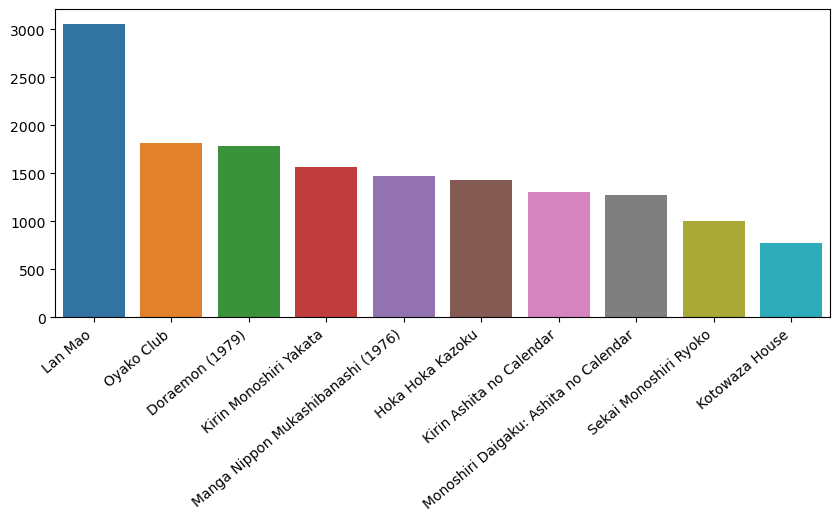

In [29]:
eda['Episodes'] = eda['Episodes'].replace('Unknown', 0).astype(str).astype(int)
epi = eda[['Name','Episodes']].sort_values(by = 'Episodes',ascending =False).head(10)
plt.figure(figsize=(10,4), dpi = 100)
sb.barplot(x=epi['Name'].unique(),y=epi['Episodes'].unique(), data=epi)
plt.xticks(rotation=40, ha = 'right')
plt.show()

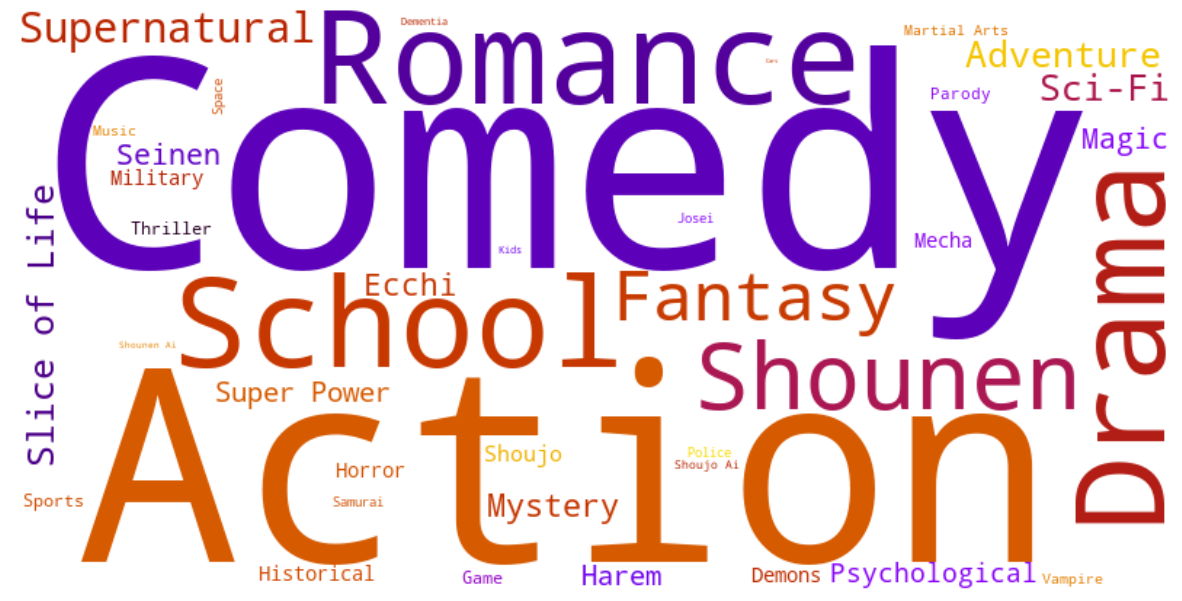

In [30]:
nonull_anime=anime_full_data.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['Genres']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
        
plt.figure(figsize= (15,10))
genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

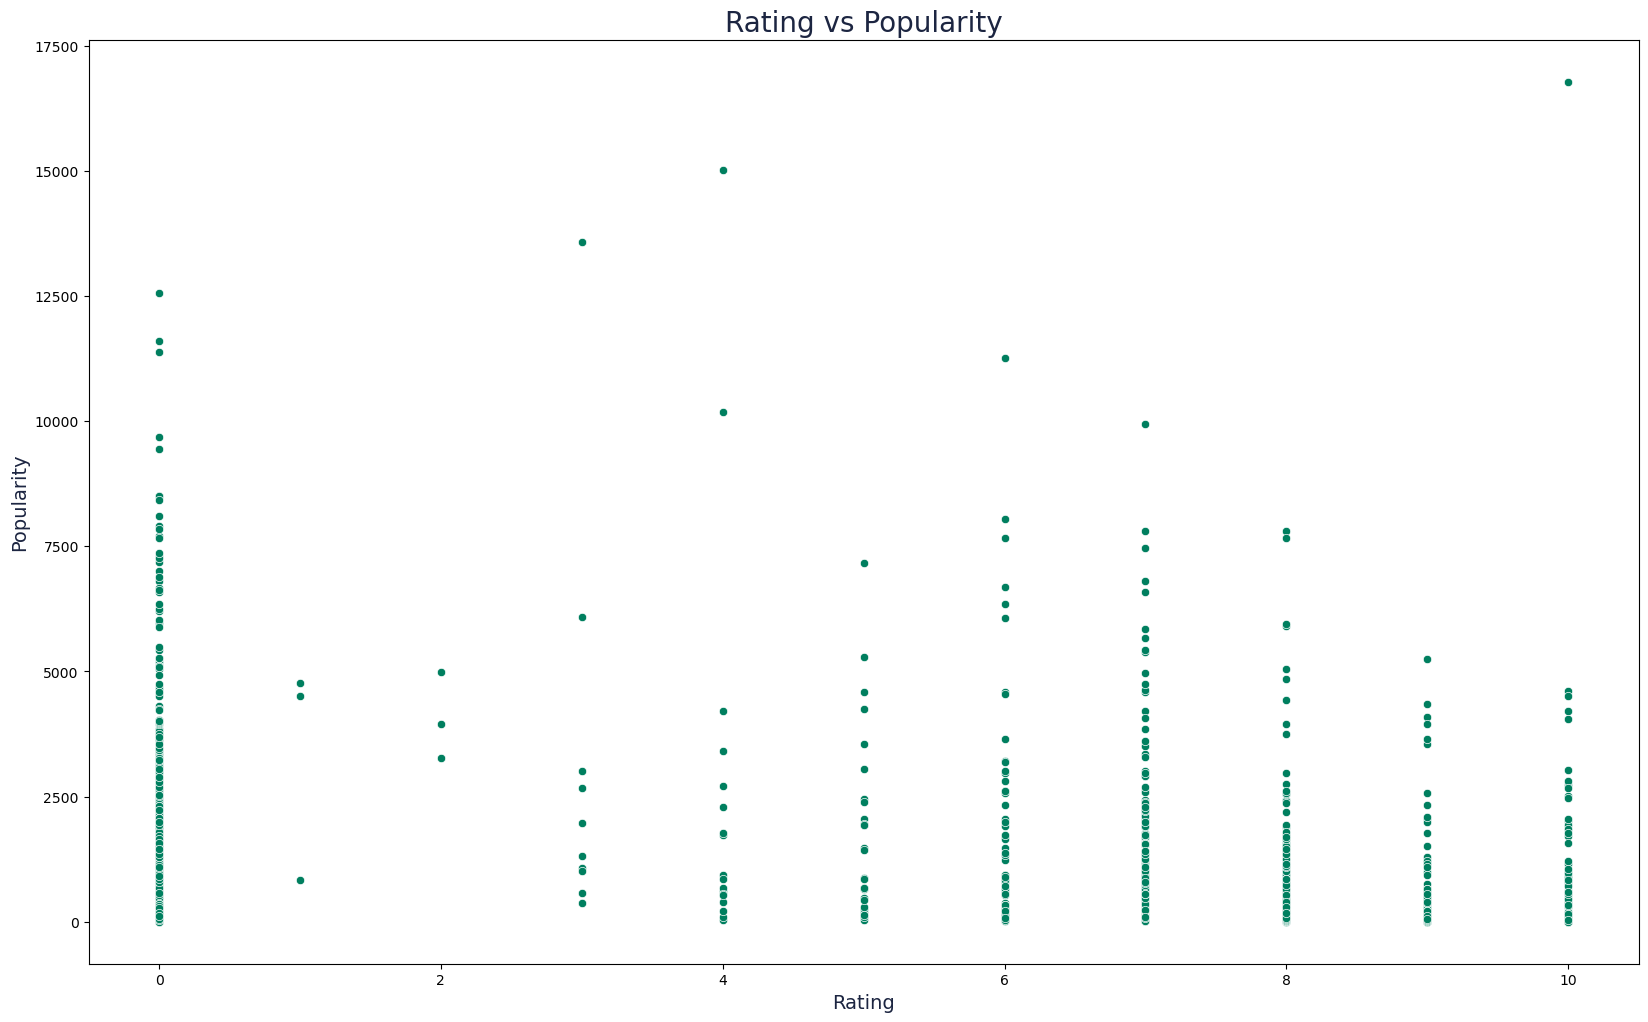

In [31]:
animes_sample = anime_full_data.sample(1000)
animes_sample.head()

### The relationship between rating and popularity
plt.figure(figsize=(20, 12))
sb.scatterplot(x='rating', y='Popularity', data=animes_sample, color='#007f5f')
plt.title('Rating vs Popularity', fontsize=20, weight=500, color='#1c2541')
plt.xlabel('Rating', fontsize=14, weight=500, color='#1c2541')
plt.ylabel('Popularity', fontsize=14, weight=500, color='#1c2541')
plt.show()


In [32]:
anime_list.rename(columns={'watching_status':'status'}, inplace=True)

In [33]:
watching_status = pd.read_csv('../archive/watching_status.csv')
watching_status.head()

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


In [34]:
anime_list = pd.merge(anime_list, watching_status, on='status')
anime_list.rename(columns={' description':'description'}, inplace=True)
anime_list.head()

,user_id,anime_id,rating,status,watched_episodes,description
0,0,67,9,1,1,Currently Watching
1,0,6702,7,1,4,Currently Watching
2,0,242,10,1,4,Currently Watching
3,0,4898,0,1,1,Currently Watching
4,0,21,10,1,0,Currently Watching


In [35]:
## add the column popularity to the anime_list
anime_list = pd.merge(anime_list, animes[['anime_id', 'Popularity']], on='anime_id')
anime_list.sort_values('Popularity', ascending=False)
anime_list.head()

,user_id,anime_id,rating,status,watched_episodes,description,Popularity
0,0,67,9,1,1,Currently Watching,940
1,55,67,0,1,0,Currently Watching,940
2,57,67,0,1,0,Currently Watching,940
3,583,67,0,1,0,Currently Watching,940
4,645,67,0,1,3,Currently Watching,940


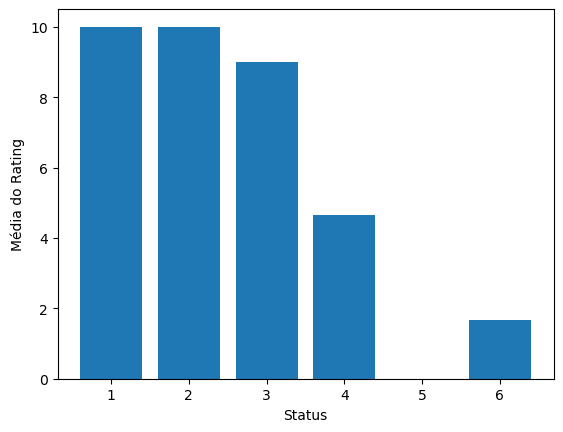

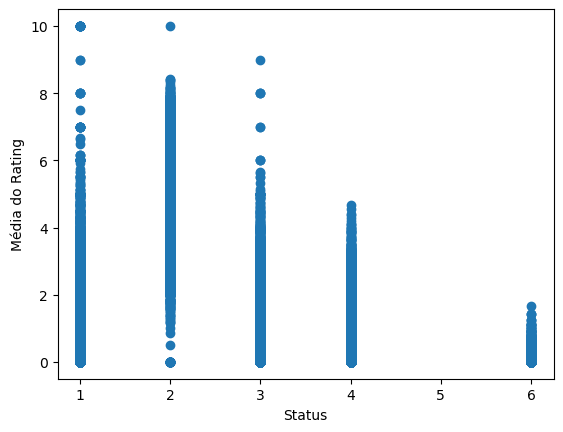

In [36]:
# Agrupa os dados por anime e status
anime_grouped = anime_list.groupby(['anime_id', 'status'])

# Calcula a média do rating para cada status
status_rating = anime_grouped['rating'].agg('mean').reset_index()

# Plota um gráfico de barras
plt.bar(status_rating['status'], status_rating['rating'])
plt.xlabel('Status')
plt.ylabel('Média do Rating')
plt.show()

# Plota um gráfico de dispersão
plt.scatter(status_rating['status'], status_rating['rating'])
plt.xlabel('Status')
plt.ylabel('Média do Rating')
plt.show()

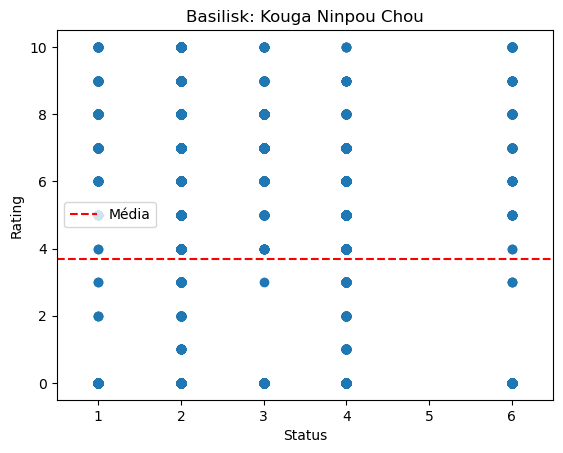

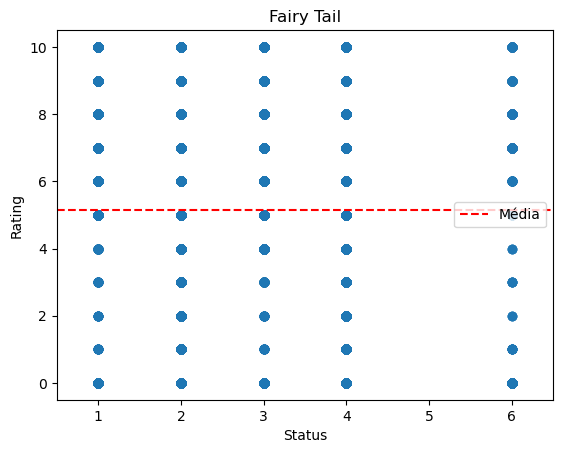

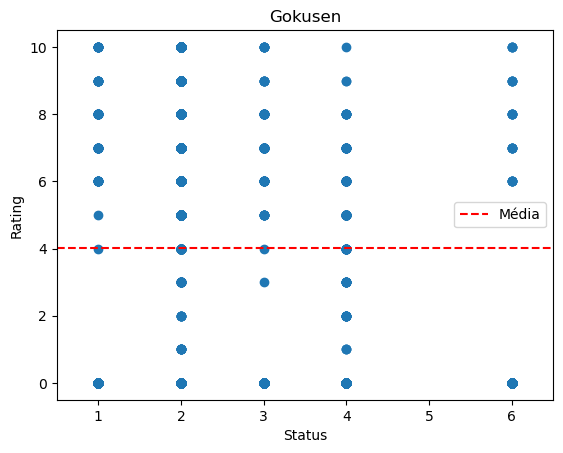

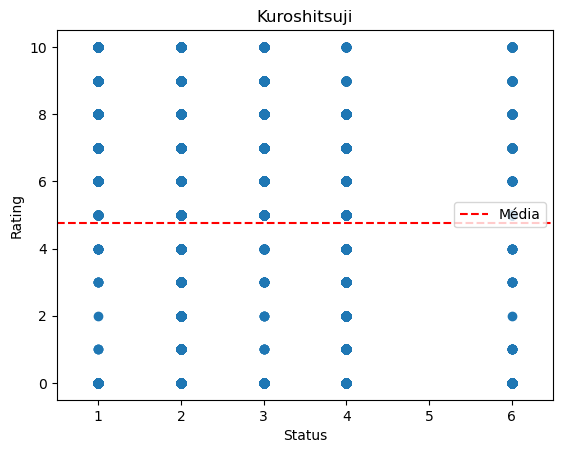

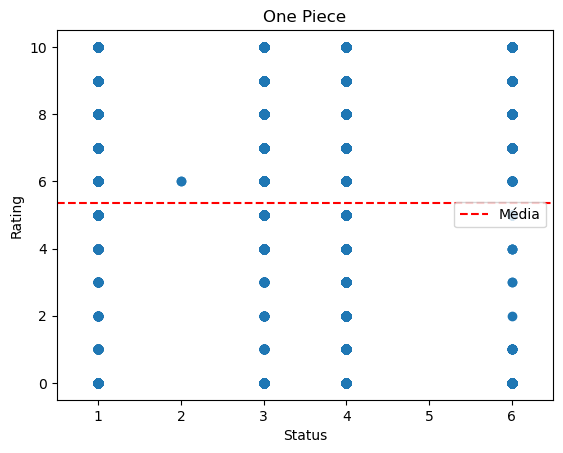

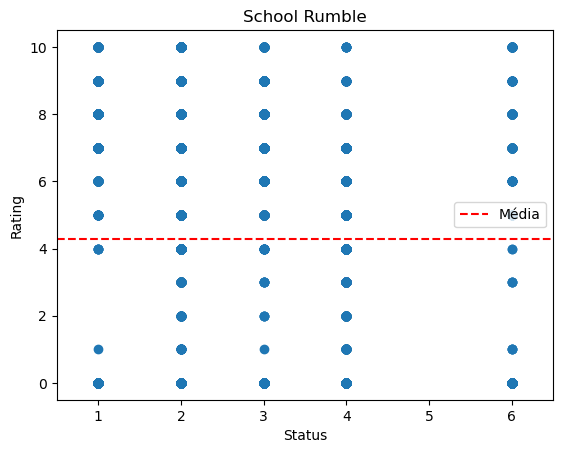

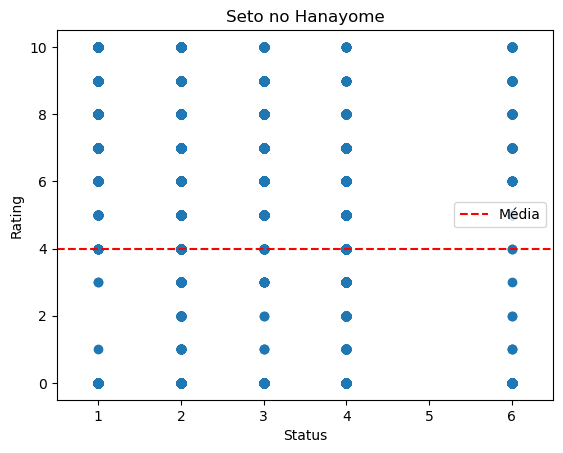

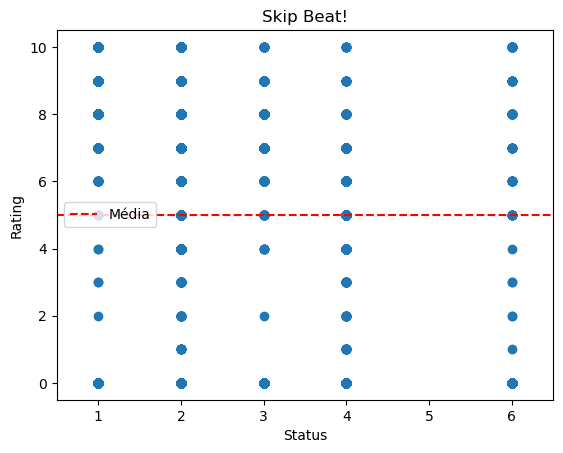

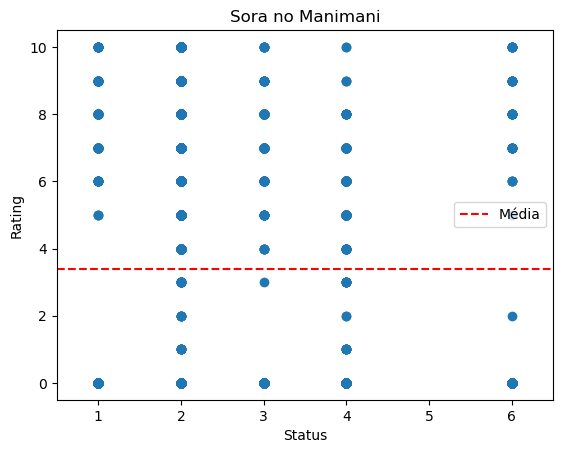

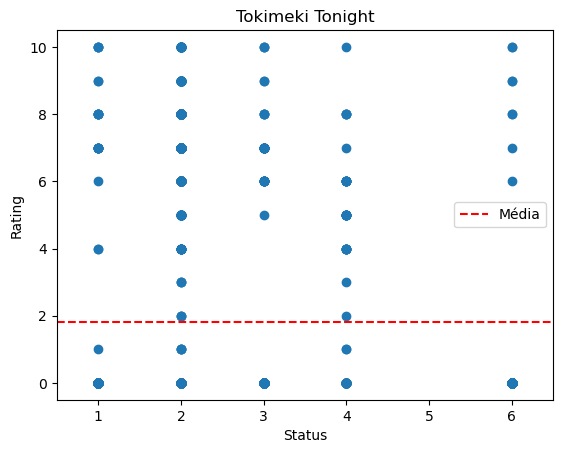

In [37]:
anime_data = anime_list['anime_id'].unique()[:10]

for anime_id in anime_data:
    # Filtra os dados para o anime atual
    anime_filtrado = anime_list[anime_list['anime_id'] == anime_id]

    # Define os dados para o gráfico de dispersão
    rating = anime_filtrado['rating']
    status = anime_filtrado['status']

    # Calcula a média do rating
    media_rating = rating.mean()

    # Plota o gráfico de dispersão
    plt.scatter(status, rating)
    plt.axhline(media_rating, color='red', linestyle='--', label='Média')
    plt.xlabel('Status')
    plt.ylabel('Rating')
    plt.title(f"{animes[animes['anime_id'] == anime_id]['Name'].values[0]}")
    plt.legend()

    # Define a escala dos eixos x e y
    plt.xlim(0.5, 6.5)
    plt.ylim(-0.5, 10.5)

    plt.show()